# Naive Bayes

In [1]:
import pandas as pd
import sys

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '../../')
import nlp_functions as nlp_f

[nltk_data] Downloading package stopwords to C:\Users\Juan
[nltk_data]     Carlos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [2]:
%%time
# Cargamos el dataset balanceado y preprocesado (es necesario subirlo)
# Botón derecho + copiar ruta
df = pd.read_csv('../../dataset/ticnn_preprocessed.csv')

Wall time: 846 ms


In [3]:
df.head()

,text,type
0,"['donald', 'trump', 'property', 'showcase', 'b...",0.0
1,"['trump', 'foundation', 'tell', 'new', 'york',...",0.0
2,"['donald', 'trump', 'prepares', 'white', 'hous...",0.0
3,"['lure', 'chinese', 'investor', 'trump', 'name...",0.0
4,"['melania', 'barron', 'trump', 'wont', 'immedi...",0.0


In [4]:
# Cambiar orden aleatoriamente
df = df.sample(frac=1)

In [5]:
df.head()

,text,type
4099,"['poll', 'clinton', 'lead', 'trump', 'national...",0.0
5289,"['racist', 'drivel']",1.0
894,"['idealism', 'miss', 'presidential', 'campaign...",0.0
8420,"['aleppo', 'mosul', 'war', 'crime', 'paul', 'v...",1.0
5086,"['britain', 'send', 'hundred', 'troop', 'russi...",1.0


In [6]:
texts = list(df['text'])
targets = list(df['type'])

In [7]:
texts[0:20]

["['poll', 'clinton', 'lead', 'trump', 'nationally', 'politico', 'hillary', 'clinton', 'continue', 'lead', 'donald', 'trump', 'nationwide', 'poll', 'likely', 'voter', 'ap', 'photo', 'nolan', 'mccaskill', 'pm', 'edt', 'update', 'pm', 'edt', 'hillary', 'clinton', 'lead', 'donald', 'trump', 'point', 'nationally', 'accord', 'cnn', 'orc', 'poll', 'release', 'monday', 'clinton', 'nearly', 'percent', 'mark', 'two', 'week', 'election', 'day', 'lead', 'trump', 'among', 'likely', 'voter', 'percent', 'percent', 'libertarian', 'nominee', 'gary', 'johnson', 'percent', 'support', 'follow', 'green', 'party', 'candidate', 'jill', 'stein', 'percent', 'story', 'continue', 'share', 'johnson', 'support', 'appear', 'go', 'equally', 'clinton', 'trump', 'percent', 'stand', 'beginning', 'month', 'johnson', 'stand', 'drop', 'percent', 'percent', 'percent', 'make', 'mind', 'percent', 'respondent', 'say', 'could', 'end', 'back', 'different', 'candidate', 'gabriel', 'debenedetti', 'trend', 'among', 'clinton', 'tr

In [8]:
x_train, y_train, x_test, y_test = nlp_f.train_test_split(texts, targets)

In [9]:
# La función de vectorización nos pide una función tokenizer como parámetro obligatorio,
# al tener el texto ya tokenizado, lo devolvemos en el mismo estado
def identity_tokenizer(text):
    return text

In [10]:
count = CountVectorizer(lowercase = False, 
                        binary = False)

In [11]:
%%time
count_x_train = count.fit_transform(x_train)

Wall time: 4.69 s


In [12]:
count_x_train

<13596x93777 sparse matrix of type '<class 'numpy.int64'>'
	with 3379487 stored elements in Compressed Sparse Row format>

In [13]:
features_train = pd.DataFrame(count_x_train.toarray(), columns = count.get_feature_names())
features_train.head()

,0001pt,000and,000arent,000billion,000compared,000emails,000employees,000for,000ft,000in,...,zwolinski,zwolinskis,zwozdiak,zx,zxh3naxffg,zxycmwjdxj,zy,zymere,zyuganov,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
count_x_test = count.transform(x_test)

In [15]:
features_test = pd.DataFrame(count_x_test.toarray(), columns = count.get_feature_names())
features_test.head()

,0001pt,000and,000arent,000billion,000compared,000emails,000employees,000for,000ft,000in,...,zwolinski,zwolinskis,zwozdiak,zx,zxh3naxffg,zxycmwjdxj,zy,zymere,zyuganov,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
len(features_test)

5827

In [17]:
%%time
naive_bayes = MultinomialNB()
naive_bayes.fit(count_x_train, y_train)

Wall time: 98.2 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
predictions = naive_bayes.predict(count_x_test)

In [19]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions))
print('F1-Score: ', f1_score(y_test, predictions))

Accuracy:  0.8796979577827355
Precision:  0.9222292191435768
Recall:  0.8657995861661247
F1-Score:  0.8931239518219241


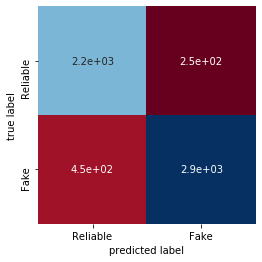

In [20]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square = True, annot = True, 
            cmap = 'RdBu', cbar = False,
            xticklabels = ['Reliable', 'Fake'], 
            yticklabels = ['Reliable', 'Fake'])

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [21]:
count.get_feature_names()

['0001pt',
 '000and',
 '000arent',
 '000billion',
 '000compared',
 '000emails',
 '000employees',
 '000for',
 '000ft',
 '000in',
 '000jobs',
 '000judge',
 '000k',
 '000km',
 '000lb',
 '000s',
 '000th',
 '000wasnt',
 '000which',
 '000x',
 '004s',
 '005s',
 '006s',
 '007s',
 '008s',
 '00am',
 '00g',
 '00pm',
 '00s',
 '0107y',
 '011s',
 '0135y',
 '01am',
 '022vfnstnd',
 '02pm',
 '02welcome',
 '033s',
 '03am',
 '03eb',
 '03pm',
 '04pm',
 '0500america',
 '053s',
 '056g',
 '06pm',
 '06quito2150',
 '06quito2991',
 '07c',
 '07dryempjx',
 '0896n',
 '08b',
 '08its',
 '08their',
 '090aa',
 '0a',
 '0annie',
 '0c',
 '0fjjvowyhg8qtskiz',
 '0h4at2yetra17uxetni02ls2jeg0mty45jrcu7mrzsrpcbq464i',
 '0hour',
 '0hq3vb2giv',
 '0in',
 '0j6tjyeysh',
 '0k',
 '0lxfawgztu',
 '0m87gioy8c',
 '0oeekvljlt',
 '0pbruepg1o',
 '0percent',
 '0pt',
 '0shpgahsnw',
 '0t5',
 '0txrbwvobzz4fi5nksw6k5a6cxzbb3juxthmdiz93cby8gvrqiypzhajvjnt2',
 '0was',
 '0womdwalmi',
 '0x',
 '1000lbs',
 '1000th',
 '100billion',
 '100bn',
 '100d',
